In [ ]:
#%%

import os

from cycler import V
import tqdm
HOME = os.getcwd()
print(HOME)

/Users/aswin/Downloads/imouse/mouse_id


In [ ]:
#%%

import supervision as sv
import tqdm
import os
from pathlib import Path

VIDEO_DIR_PATH = f"{HOME}/videos"
IMAGE_DIR_PATH = f"{HOME}/images"
FRAME_STRIDE = 10
print('video directory:', VIDEO_DIR_PATH)

video directory: /Users/aswin/Downloads/imouse/mouse_id/videos


In [ ]:
#%%

import os
HOME = os.getcwd()
print(HOME)

/Users/aswin/Downloads/imouse/mouse_id


In [ ]:
#%%

VIDEO_DIR_PATH = f"{HOME}/videos"
IMAGE_DIR_PATH = f"{HOME}/images"
FRAME_STRIDE = 10

In [ ]:
#%%

VIDEO_DIR_PATH = f"{HOME}/videos"
IMAGE_DIR_PATH = f"{HOME}/images"
FRAME_STRIDE = 10

In [ ]:
#%%

"""**NOTE:** Notice that we put two of our videos aside so that we can use them at the end of the notebook to evaluate our model."""

import supervision as sv
from tqdm.notebook import tqdm

video_paths = sv.list_files_with_extensions(
    directory=VIDEO_DIR_PATH,
    extensions=["mov", "mp4"])

TEST_VIDEO_PATHS, TRAIN_VIDEO_PATHS = video_paths[:2], video_paths[2:]

for video_path in tqdm(TRAIN_VIDEO_PATHS):
    video_name = video_path.stem
    image_name_pattern = video_name + "-{:05d}.png"
    with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
        for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
            sink.save_image(image=image)

"""### Display image sample

**NOTE:** Before we start building a model with autodistill, let's make sure we have everything we need.
"""

import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

  0%|          | 0/7 [00:00<?, ?it/s]

image count: 247


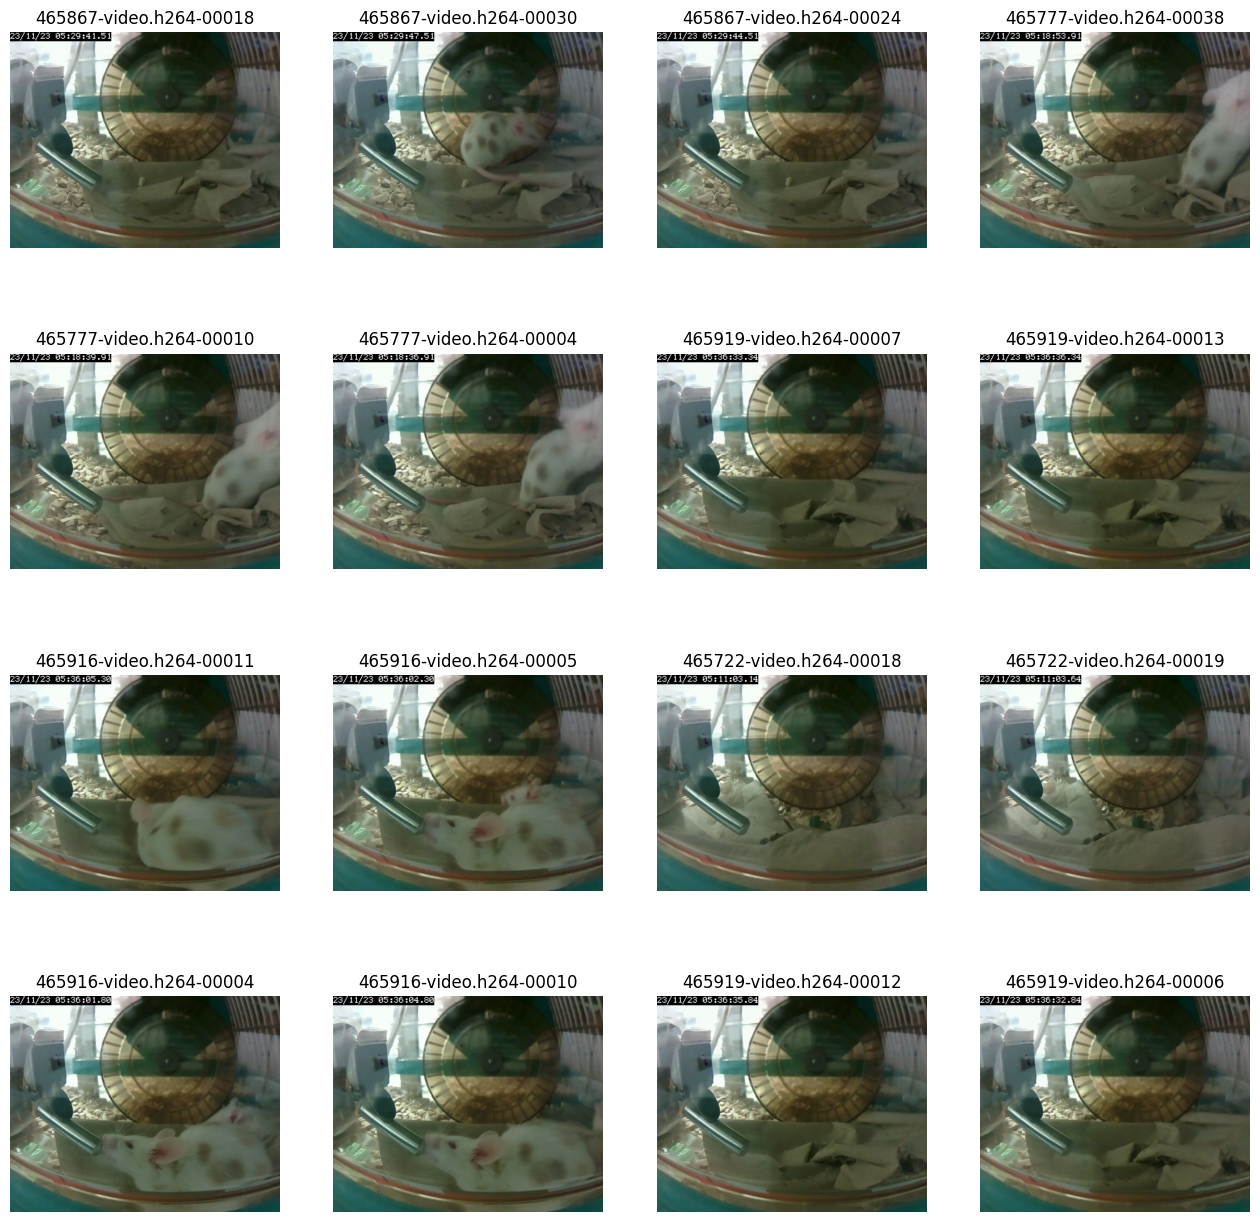

In [ ]:
#%%

"""**NOTE:** We can also plot sample of our image dataset."""

IMAGE_DIR_PATH = f"{HOME}/images"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

In [ ]:
#%%

"""## 🏷️ Autolabel dataset

### Define ontology

**Ontology** - an Ontology defines how your Base Model is prompted, what your Dataset will describe, and what your Target Model will predict. A simple Ontology is the CaptionOntology which prompts a Base Model with text captions and maps them to class names. Other Ontologies may, for instance, use a CLIP vector or example images instead of a text caption.
"""

from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "mouse": "mouse",
    "water": "water"
})